## Census Income Dataset

## Problem Statement :
The dataset given below contains the census information about the attributes of individuals as the features and their income as the target. The task is to predict whether a person makes over $50K a year or not.

## About the dataset:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).  

The data has 1032 instances and 15 features. For your information the target variable `Income` has already been label encoded.
1 indicates the income is greater than or equal to 50K. 0 indicates the income is less than 50K. Below is a brief about the features in the dataset.

|Features|Description|
|-----|-----|
|age|Age of the person|
|Workclass|Categorical variable having 8 categories each denoting the type of employment|
|fnlwgt|final weight. |
|education|Categorical variable with 16 categories each denoting the qualification of the person.|
|education-num|number of years of education|
|marital-status|Categorical variable with 7 categories|
|occupation|Categorical variable with 14 categories each denoting the type of occupation of the individual|
|relationship|Categorical variable with 6 categories.|
|race|Categorical variable with 5 categories each denoting the ethnicity of the individual|
|sex|Gender of the person|
|capital-gain|Continuous| 
|capital-loss|Continuous|
|hours-per-week|Working hours per week|
|native-country|Categorical|
|Income|Target variable. 1 indicates >=50k. 0 indicates <50K|



### Reading the data using pandas module.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataframe = pd.read_csv('Data/adult_preprocessed.csv',index_col=0)

In [ ]:
dataframe.head()

### Check for null values and get a summary of all the columns in the dataset

In [29]:
# Check for null values
dataframe.isnull().sum()

age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [30]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 1119
Data columns (total 15 columns):
age               1032 non-null int64
Workclass         1032 non-null object
fnlwgt            1032 non-null int64
education         1032 non-null object
education-num     1032 non-null int64
marital-status    1032 non-null object
occupation        1032 non-null object
relationship      1032 non-null object
race              1032 non-null object
sex               1032 non-null object
capital-gain      1032 non-null int64
capital-loss      1032 non-null int64
hours-per-week    1032 non-null int64
native-country    1032 non-null object
Income            1032 non-null int64
dtypes: int64(7), object(8)
memory usage: 129.0+ KB


In [31]:
# Get a summary of the columns in the dataset
dataframe.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
count,1032.000000,1.032000e+03,1032.000000,1032.00000,1032.000000,1032.000000,1032.000000
mean,37.954457,1.918318e+05,10.221899,560.19186,102.870155,40.706395,0.246124
std,12.825353,1.074243e+05,2.501636,2406.47961,432.251488,11.736603,0.430961
min,17.000000,2.117400e+04,1.000000,0.00000,0.000000,1.000000,0.000000
25%,28.000000,1.155792e+05,9.000000,0.00000,0.000000,40.000000,0.000000
50%,37.000000,1.807065e+05,10.000000,0.00000,0.000000,40.000000,0.000000
75%,46.000000,2.461932e+05,13.000000,0.00000,0.000000,45.000000,0.000000
max,90.000000,1.033222e+06,16.000000,25236.00000,2415.000000,99.000000,1.000000


### For further analysis split to bring all the continuous variables together and categorical variables together.

In [32]:
# Seperate continuous variables and categorical variables
dataframe_con = dataframe.select_dtypes(include=np.number) #include='int64'
dataframe_cat = dataframe.select_dtypes(exclude=np.number)
print(dataframe_con.head())

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   Income  
0       0  
1       0  
2       0  
3       0  
4       0  


In [33]:
print(dataframe_cat.head())

           Workclass   education       marital-status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native-country  
0   Not-in-family   White     Male   United-States  
1         Husband   White     Male   United-States  
2   Not-in-family   White     Male   United-States  
3         Husband   Black     Male   United-States  
4            Wife   Black   Female            Cuba  


###  Plotting a stacked bar chart, have an estimate of the number of people with income above and below 50K with respect to each of the categorical features

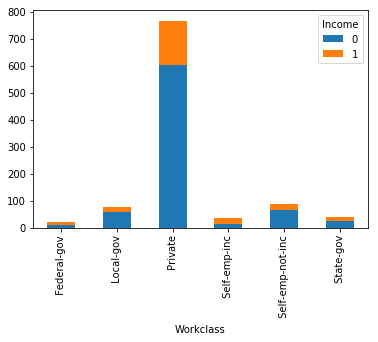

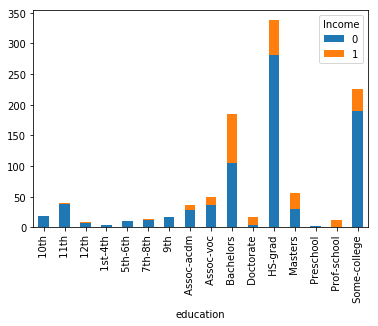

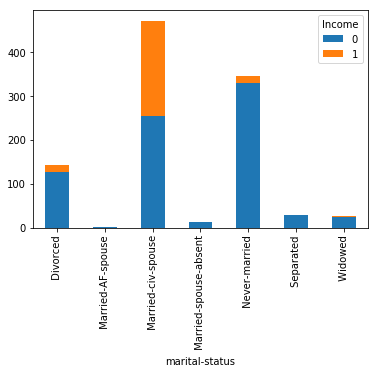

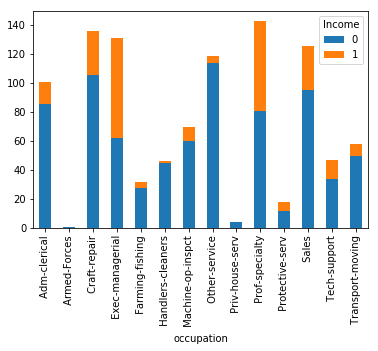

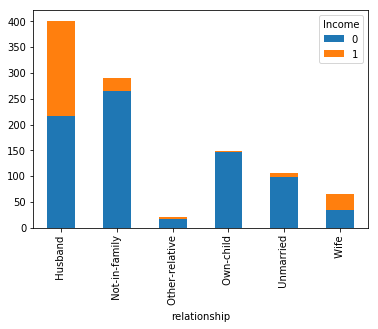

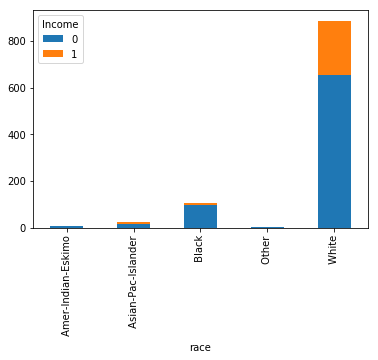

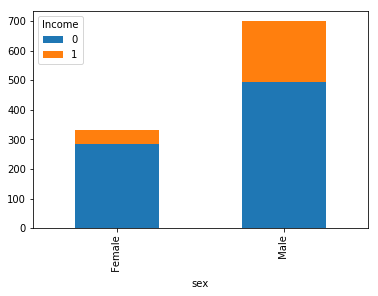

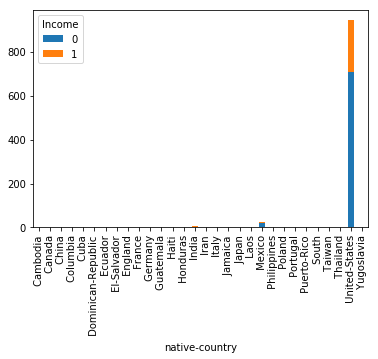

In [34]:
for feature in dataframe_cat:
    dataframe.groupby(feature)['Income'].value_counts().unstack().plot(kind='bar',stacked=True) #pivottable also gives results

### What can you infer from the above visualisations ?

### Plot a histogram for all the continuous variables to check for skewness

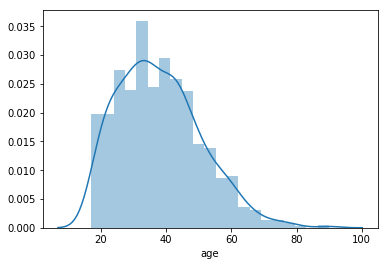

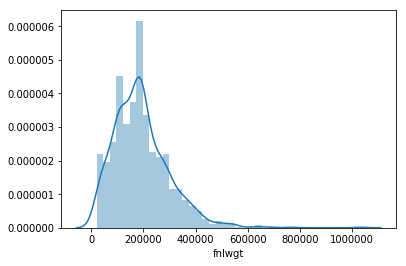

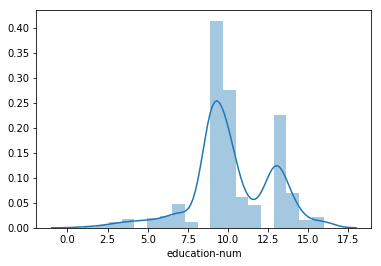

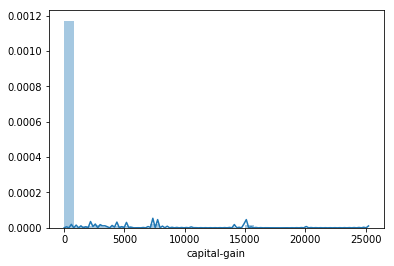

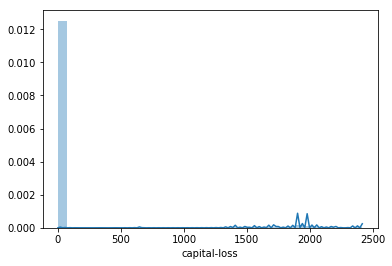

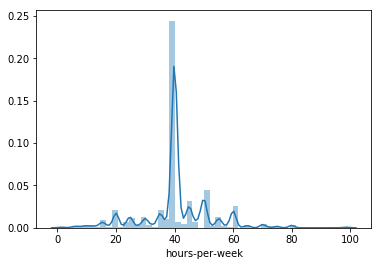

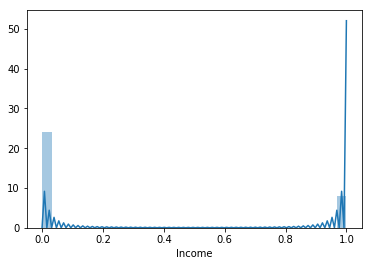

In [35]:
for col in dataframe_con:
    sns.distplot(dataframe[col])
    plt.show()  #if not uses plots only one histogram

### Majority of values in capital-gain and capital-loss are zeros. So remove the columns

In [36]:
dataframe_con.drop(columns=['capital-gain','capital-loss'],inplace=True)

In [37]:
dataframe_con.head()

,age,fnlwgt,education-num,hours-per-week,Income
0,39,77516,13,40,0
1,50,83311,13,13,0
2,38,215646,9,40,0
3,53,234721,7,40,0
4,28,338409,13,40,0


### Check for skewness in the continuous data

In [38]:
skew(dataframe_con)

array([ 0.61605344,  1.39375579, -0.30220179,  0.16318627,  1.17875794])

### The column `fnlwgt` is a highly right skewed column. Remove the skewness using a log transform and then check if the skewness has been removed by plotting its histogram

In [39]:
dataframe_con['fnlwgt'] = np.log(dataframe_con['fnlwgt'])  #np.log1p can alsoe be used,log1p=log(1+p) never fails ,log(0) is not defined

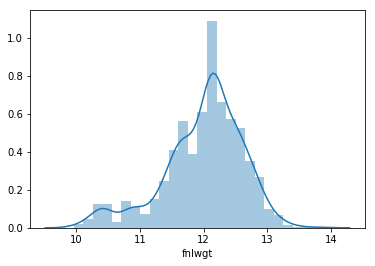

In [40]:
sns.distplot(dataframe_con['fnlwgt'])

In [41]:
skew(dataframe_con)

array([ 0.61605344, -0.77601357, -0.30220179,  0.16318627,  1.17875794])

In [42]:
dataframe_con['fnlwgt'].skew()

-0.7771435943336795

### Check for the pearson correlation between the continuous variables by plotting a heatmap

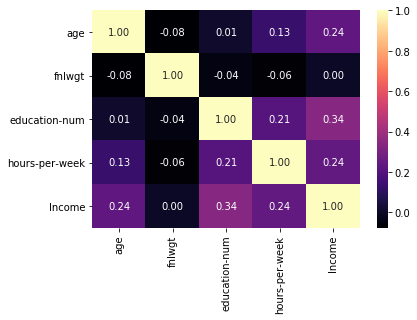

In [43]:
# Check for correlation between continuous variables
sns.heatmap(dataframe_con.corr(), annot=True, fmt='.2f', cmap='magma')

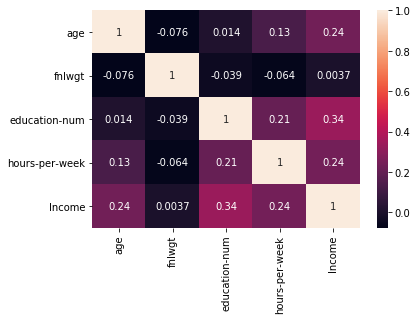

In [44]:
sns.heatmap(dataframe_con.corr(),annot=True)

### Label Encode all the categorical variables

In [45]:
# Label Encode Categorical variables
le = LabelEncoder()
for feat in dataframe_cat:
    dataframe_cat[feat]=le.fit_transform(dataframe_cat[feat])

In [46]:
dataframe_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,28
1,4,9,2,3,0,4,1,28
2,2,11,0,5,1,4,1,28
3,2,1,2,5,0,2,1,28
4,2,9,2,9,5,2,0,4


### Concatenate both the continuous and categorical dataframes

In [47]:
df_new = pd.concat([dataframe_con,dataframe_cat],axis=1)

In [48]:
df_new.head()

,age,fnlwgt,education-num,hours-per-week,Income,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,11.258240,13,40,0,5,9,4,0,1,4,1,28
1,50,11.330336,13,13,0,4,9,2,3,0,4,1,28
2,38,12.281393,9,40,0,2,11,0,5,1,4,1,28
3,53,12.366153,7,40,0,2,1,2,5,0,2,1,28
4,28,12.732011,13,40,0,2,9,2,9,5,2,0,4


### Split into features and target

In [49]:
X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [50]:
X.head()

,age,fnlwgt,education-num,hours-per-week,Income,Workclass,education,marital-status,occupation,relationship,race,sex
0,39,11.258240,13,40,0,5,9,4,0,1,4,1
1,50,11.330336,13,13,0,4,9,2,3,0,4,1
2,38,12.281393,9,40,0,2,11,0,5,1,4,1
3,53,12.366153,7,40,0,2,1,2,5,0,2,1
4,28,12.732011,13,40,0,2,9,2,9,5,2,0


In [51]:
# Fitting a Standard Scaler 
ss = StandardScaler()
P = ss.fit_transform(X)
type(P)

numpy.ndarray

### Fit a StandardScaler on the features

In [52]:
# Fitting a Standard Scaler 
ss = StandardScaler()
for feature in X:
    X[feature]=ss.fit_transform(X[[feature]])


In [53]:
X.head()

,age,fnlwgt,education-num,hours-per-week,Income,Workclass,education,marital-status,occupation,relationship,race,sex
0,0.081561,-1.172708,1.111052,-0.060217,-0.571383,3.026993,-0.379789,0.935132,-1.570166,-0.294678,0.390011,0.687155
1,0.939653,-1.057836,1.111052,-2.361827,-0.571383,1.941567,-0.379789,-0.402437,-0.819975,-0.902893,0.390011,0.687155
2,0.003553,0.457498,-0.488677,-0.060217,-0.571383,-0.229286,0.167999,-1.740006,-0.319849,-0.294678,0.390011,0.687155
3,1.173678,0.592546,-1.288541,-0.060217,-0.571383,-0.229286,-2.570939,-0.402437,-0.319849,-0.902893,-2.079263,0.687155
4,-0.776531,1.175473,1.111052,-0.060217,-0.571383,-0.229286,-0.379789,-0.402437,0.680405,2.138182,-2.079263,-1.455275


### Convert array to a dataframe

In [ ]:
#X=pd.DataFrame(X)

### Split into train and validation data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2)

### Fit a logistic regression model

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)

In [ ]:
y_pred = logreg.predict(X_test)

### Checking the accuracy, f1_score, confusion matrix

### Perform hyperparameter tuning using GridSearch

### Find the best parameters and the metrics after grid search